### Sample program for SVR fitting and saving model file  

#### Import libraries  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

#### Parameters  

In [4]:
csv_in = 'vibration.csv'

#### Read CSV file  

In [5]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


,x,y
0,-1.500,-0.795
1,-1.474,-0.879
2,-1.472,-0.885
3,-1.470,-0.889
4,-1.460,-0.914


#### Obtain X and y  

In [6]:
X = df[['x']]
print(X.shape)
y = df['y']
print(y.shape)

(200, 1)
(200,)


#### Split X and y for train and test  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

#### Scaling (NOTE: sc is generated by training data)  

In [8]:
sc = MinMaxScaler(feature_range=(0, 1), copy=True)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#### Parameters for SVR  

In [9]:
C = 100.0
gamma = 'scale'
epsilon = 0.2

#### Execute SVR  

In [10]:
svr = SVR(gamma=gamma, C=C, epsilon=epsilon)
svr.fit(X_train_std, y_train)

SVR(C=100.0, epsilon=0.2)

#### Do prediction using train data  

In [11]:
y_train_pred = svr.predict(X_train_std)

#### Scaling of Test data and do prediction  

In [12]:
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Check MSE  

In [13]:
mse_train = mean_squared_error(y_train_pred, y_train)
print('MSE (train):', mse_train)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE (test):', mse_test)

MSE (train): 0.044634892740487195
MSE (test): 0.10866891418706841


#### Scatter plot of the prediction of SVR and true value for train / test data  

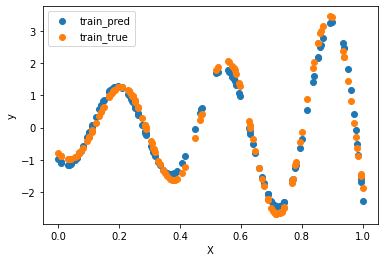

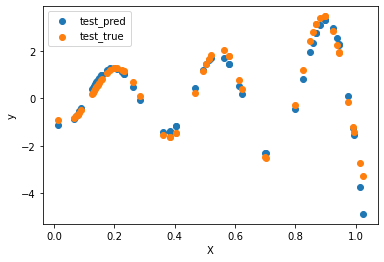

In [14]:
plt.scatter(X_train_std, y_train_pred, label='train_pred')
plt.scatter(X_train_std, y_train, label='train_true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.scatter(X_test_std, y_test_pred, label='test_pred')
plt.scatter(X_test_std, y_test, label='test_true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Scatter plot of output of SVR (prediction) and true value for train / test data  

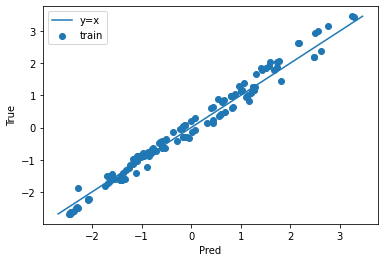

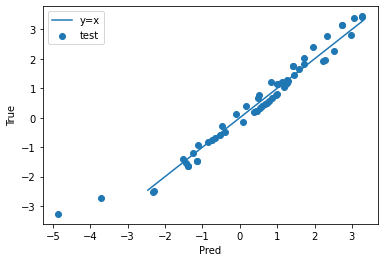

In [15]:
plt.scatter(y_train_pred, y_train, label='train')
xmin = np.array([y_train.min(), y_train.max()])
xmax = np.array([y_train.min(), y_train.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

plt.scatter(y_test_pred, y_test, label='test')
xmin = np.array([y_train_pred.min(), y_train_pred.max()])
xmax = np.array([y_train_pred.min(), y_train_pred.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

#### Save developed SVR model  

In [16]:
tag = 'vibration'
sc_file = 'sc_{}.joblib'.format(tag)
dump(sc, sc_file)
model_file = 'svr_{}_rbf_c{}_g{}_e{}.joblib'.format(tag,C,gamma,epsilon)
dump(svr, model_file)

['svr_vibration_rbf_c100.0_gscale_e0.2.joblib']